#### [지도학습 - 회귀]
- 회귀(Regression) : 수치값을 예측하는 학습
    * 예: 거리, 시간, 무게, 집값 등등...
- 주제 : 공부 시간과 과외 횟수에 따른 점수 예측
- 방법 : Linear Model 계열의 LinearRegression

[1] 모듈 로딩 및 데이터 준비 <hr>

In [78]:
# ==================================================
# [1-1] 모듈 로딩
# ==================================================
# 기본 모듈
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import koreanize_matplotlib

# ML 데이터셋 및 학습 관련 모듈
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# ML 모델 성능 지표 관련 모듈
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import root_mean_squared_error, r2_score

# CoW 활성화 : 복사와 공유 자동 설정
pd.options.mode.copy_on_write = True

# 판다스/넘파이에 지수표기법(과학적표기법) 정지 설정
pd.options.display.float_format = '{:.5f}'.format
np.set_printoptions(precision=6, suppress=True)

In [79]:
# ==================================================
# [1-2] 데이터 준비 및 확인
# ==================================================
# 데이터 준비
hour = [1, 2, 3, 5, 7, 8, 10]
count = [0, 0, 1, 1, 2, 2, 2]
score = [15, 32, 45, 55, 60, 73, 91]

# 공부 시간과 과외 횟수, 성적 데이터셋
dataDF = pd.DataFrame({'Hour':hour, 'Count': count, 'Score':score})
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Hour    7 non-null      int64
 1   Count   7 non-null      int64
 2   Score   7 non-null      int64
dtypes: int64(3)
memory usage: 300.0 bytes


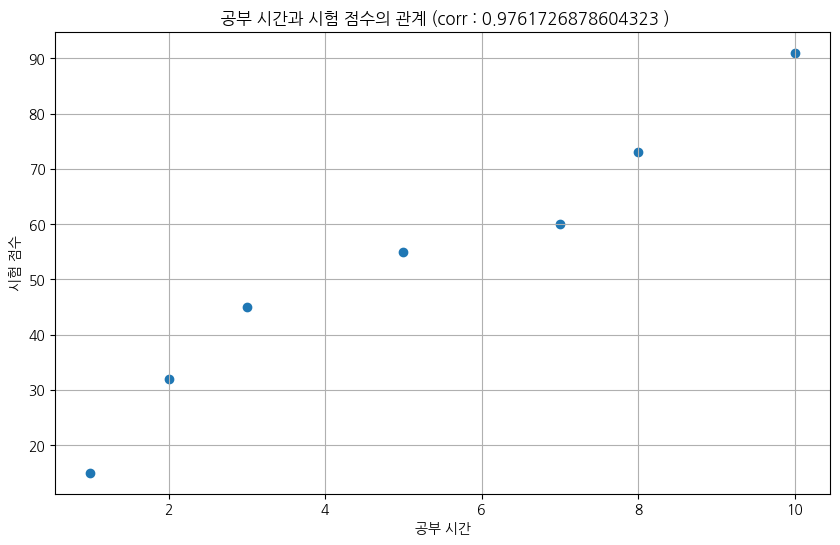

In [80]:
# ====================================================================
# 공부 시간과 과외 횟수, 성적 관계 시각화 => Linear Model로써 피쳐와 타겟 선형 관계성
# ====================================================================
# 상관계수 계산 : [기본] pearsom -> 피쳐와 타겟의 직선의 선형성
corr_ = dataDF.corr(numeric_only = True)['Score']
corr_value = corr_['Hour']

# => 시각화
plt.figure(figsize = (10, 6))
plt.scatter(dataDF.Hour, dataDF.Score)
plt.title(f" 공부 시간과 시험 점수의 관계 (corr : {corr_value} )")
plt.xlabel('공부 시간')
plt.ylabel('시험 점수')
plt.grid()
plt.show()

In [81]:
# [2-1] 피처(2D)와 타겟(1D) 분리 
# 피처 : 길이, 타겟 : 무게
featureDF = dataDF[dataDF.columns[0:-1]]    # Hour, Count
targetSR = dataDF[dataDF.columns[-1]]        # Score

print(f'featureDF : {featureDF.shape}, targetSR : {targetSR.shape}')
featureDF.head(1)

featureDF : (7, 2), targetSR : (7,)


,Hour,Count
0,1,0


In [82]:
# [2-2] 학습용과 테스트용 분리 : 회귀 시에는 stratify 필요 없음, 
#                             분류 시에는 클래스/라벨별 비율 설정을 위해서 stratify 필요!
x_train, x_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR, 
                                                    test_size=0.2,
                                                    random_state=10,
)
print(f'[TRAIN]  x_train : {x_train.shape}, y_train : {y_train.shape}')
print(f'[TEST]  x_test : {x_test.shape}, y_test : {y_test.shape}')

[TRAIN]  x_train : (5, 2), y_train : (5,)
[TEST]  x_test : (2, 2), y_test : (2,)


[3] 학습 진행 <hr>

In [83]:
# 모델 인스턴스 생성
lrModel = LinearRegression()
lrModel

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [84]:
# 학습 진행 -> 학습용 데이터 셋만 사용(train) => 가장 최적의 선형식 시험점수 = 공부시간*W2 + 과외 횟수*W1 + W0
lrModel.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [85]:
# 학습 후 학습용 데이터셋 기반 모델 파라미터 설정
# - 모델 파라미터 : 파라미터이름_ = 피쳐에 곱해지는 가중치 W, 결과 미세조정 절편 bias
print('가중치 coef_ :', lrModel.coef_)
print('절편 intercept_ :',lrModel.intercept_)
print('feature_names_in_ :',lrModel.feature_names_in_)
print('n_features_in_ :',lrModel.n_features_in_)

print(f'선형식 즉, 모델 : 시험점수 = {lrModel.coef_[0]:.3f}*공부시간 + {lrModel.coef_[1]:.3f}*과외횟수 + {lrModel.intercept_:.3f}')

가중치 coef_ : [ 15.833333 -26.      ]
절편 intercept_ : 0.1666666666666714
feature_names_in_ : ['Hour' 'Count']
n_features_in_ : 2
선형식 즉, 모델 : 시험점수 = 15.833*공부시간 + -26.000*과외횟수 + 0.167


[4] 성능평가 <hr>

In [86]:
# 훈련용 성능평가 & 테스트용 성능평가 비교
# => 회귀모델 score() => r2_score 계산 진행 0 ~ 1 => 1에 가까울수록 좋은 성능!
# => 음수값 성능이 나오는 경우 => 쓰레기 모델! 즉 타겟과 상관성이 없는 피쳐들일 수 있음!
train_score = lrModel.score(x_train, y_train)
test_score = lrModel.score(x_test, y_test)

print(f'[train_score] {train_score}')
print(f'[test_score] {test_score}')

[train_score] 0.9962156317578004
[test_score] 0.2583228313379542


In [87]:
# ============================================
# 다양한 회귀 모델 성능지표 확인
# ============================================
# => 예측값과 실제값 함수에 전달
pre_score = lrModel.predict(x_test)

# => 성능 지표 계산
# => 에러/오차/잔차 : 값이 0에 가까울수록 좋음
print("MAE : ", mean_absolute_error(y_test, pre_score))
print("MSE : ", mean_squared_error(y_test, pre_score))
print("RMSE : ", root_mean_squared_error(y_test, pre_score))

# => 회귀선이 얼마나 데이터를 잘 설명/표현하는가? -> 값이 1에 가까울수록 좋음
print("R2 : ", r2_score(y_test, pre_score))     # => 회귀모델.score()에서 사용하는 계산 값

MAE :  19.41666666666667
MSE :  392.34722222222223
RMSE :  19.807756617603676
R2 :  0.2583228313379542
